In [1]:
import pandas as pd
import numpy as np
from functools import reduce

In [2]:
import matplotlib.pyplot as plt

In [3]:
the = pd.read_csv('Real_GDP_per_capita.csv',thousands=',')

In [4]:
the['value'] = the['value'].replace('[\$,]', '', regex=True).astype(float)

In [5]:
gdp = the.drop(columns=["slug","date_of_information","region","ranking"])

In [6]:
gdp.rename(columns={'value': 'gdp'}, inplace=True)

In [7]:
gdp.head(15)

,name,gdp
0,Liechtenstein,139100.0
1,Monaco,115700.0
2,Luxembourg,115700.0
3,Singapore,106000.0
4,Ireland,102500.0
5,Qatar,92900.0
6,Isle of Man,84600.0
7,Bermuda,80300.0
8,Switzerland,71000.0
9,Falkland Islands (Islas Malvinas),70800.0


In [8]:
life = pd.read_csv('Life_expectancy_at_birth.csv')

In [3]:
life.head(100)

NameError: name 'life' is not defined

In [10]:
real_gdp = pd.read_csv("Real_GDP.csv")
real_gdp['value'] = real_gdp['value'].replace('[\$,]', '', regex=True).astype(float)
total_gdp = real_gdp.drop(columns=["slug","date_of_information","region","ranking"])
total_gdp.rename(columns={'value': 'total_gdp'}, inplace=True)

In [11]:
total_gdp.head()

,name,total_gdp
0,China,2.486100e+13
1,United States,2.113200e+13
2,India,9.279000e+12
3,Japan,5.126000e+12
4,Germany,4.523000e+12


In [12]:
unemployment = pd.read_csv("Unemployment_rate.csv")

In [13]:
un = unemployment.drop(columns=["slug","date_of_information","region","ranking"])

In [14]:
un.head()

,name,%
0,Cocos (Keeling) Islands,0.10
1,Qatar,0.26
2,Cambodia,0.61
3,Niger,0.75
4,Falkland Islands (Islas Malvinas),1.00


In [15]:
debt_external = pd.read_csv("debt_external.csv")
debt_external['value'] = debt_external['value'].replace('[\$,]', '', regex=True).astype(float)
debt = debt_external.drop(columns=["slug","date_of_information","region","ranking"])
debt.rename(columns={'value': 'debt'}, inplace=True)

In [16]:
debt.head()

,name,debt
0,United States,2.027595e+13
1,United Kingdom,8.722000e+12
2,France,6.356000e+12
3,Germany,5.671463e+12
4,Netherlands,4.345413e+12


In [50]:
people = pd.read_csv("population.csv")
population = people.drop(columns=["slug","date_of_information","region","ranking"])
population.rename(columns={'value': 'population'}, inplace=True)

In [52]:
population['population'] = population['population'].replace('[\$,]', '', regex=True).astype(float)

In [53]:
population.head()

,name,population
0,China,1.413143e+09
1,India,1.399180e+09
2,United States,3.396651e+08
3,Indonesia,2.794763e+08
4,Pakistan,2.476536e+08


In [54]:
education_expenditures = pd.read_csv("education_expenditures.csv")
education_expenditures.head()

,name,slug,% of GDP,date_of_information,ranking,region
0,Marshall Islands,marshall-islands,13.6,2020,1,Australia and Oceania
1,Solomon Islands,solomon-islands,12.8,2020,2,Australia and Oceania
2,Kiribati,kiribati,12.4,2019,3,Australia and Oceania
3,Greenland,greenland,10.2,2019,4,North America
4,Bolivia,bolivia,9.8,2020,5,South America


In [55]:
education_expenditures = pd.read_csv("education_expenditures.csv")
edu_exp = education_expenditures.drop(columns=["slug","date_of_information","region","ranking"])
edu_exp.rename(columns={'% of GDP': 'education_expenditures % of GDP'}, inplace=True)

In [56]:
edu_exp.head()

,name,education_expenditures % of GDP
0,Marshall Islands,13.6
1,Solomon Islands,12.8
2,Kiribati,12.4
3,Greenland,10.2
4,Bolivia,9.8


In [57]:
dfs = [gdp,life,total_gdp,un,debt,population,edu_exp]

In [58]:
merge_df = reduce(lambda left, right:pd.merge(left,right, on='name',how='inner'),dfs)

In [59]:
merge_df.head(15)

,name,gdp,slug,years,date_of_information,ranking,region,total_gdp,%,debt,population,education_expenditures % of GDP
0,Liechtenstein,139100.0,liechtenstein,82.8,2023,21,Europe,4.978000e+09,2.40,0.000000e+00,39993.0,2.6
1,Luxembourg,115700.0,luxembourg,83.2,2023,14,Europe,7.404500e+10,5.23,4.266792e+12,660924.0,5.0
2,Singapore,106000.0,singapore,86.5,2023,2,East and Southeast Asia,5.782540e+11,3.62,1.557646e+12,5975383.0,2.8
3,Ireland,102500.0,ireland,82.2,2023,29,Europe,5.158800e+11,6.63,2.829000e+12,5323991.0,3.1
4,Qatar,92900.0,qatar,80.0,2023,54,Middle East,2.496360e+11,0.26,1.678000e+11,2532104.0,3.2
5,Bermuda,80300.0,bermuda,82.3,2023,28,North America,5.127000e+09,7.00,2.515000e+09,72576.0,1.9
6,Switzerland,71000.0,switzerland,83.8,2023,7,Europe,6.182280e+11,5.32,1.909000e+12,8563760.0,5.2
7,United Arab Emirates,69700.0,united-arab-emirates,79.8,2023,58,Middle East,6.530670e+11,3.36,2.376000e+11,9973449.0,3.9
8,Norway,67500.0,norway,83.0,2023,16,Europe,3.681510e+11,4.99,6.510400e+11,5597924.0,5.9
9,Macau,64800.0,macau,85.2,2023,3,East and Southeast Asia,4.449000e+10,3.01,0.000000e+00,639971.0,6.3


In [60]:
print(merge_df.columns)

Index(['name', 'gdp', 'slug', ' years', 'date_of_information', 'ranking',
       'region', 'total_gdp', '%', 'debt', 'population',
       'education_expenditures % of GDP'],
      dtype='object')


In [61]:
df = merge_df.drop(columns = ['name','slug', 'date_of_information', 'region'])

In [62]:
independent = df['gdp']

In [63]:
dependent = df[' years']

In [64]:
X = independent.values.reshape(-1,1)

In [65]:
y = dependent.values.reshape(-1,1)

In [66]:
#data1 = data[data['class'] =='Abnormal']

In [67]:
#X = X.flatten() if isinstance(X, np.ndarray) else X
#y = y.flatten() if isinstance(y, np.ndarray) else y

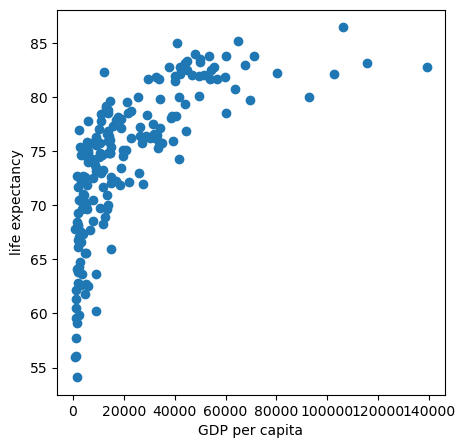

In [68]:
plt.figure(figsize=[5,5])
plt.scatter(x=X,y=y)
plt.xlabel('GDP per capita')
plt.ylabel('life expectancy')
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
reg = LinearRegression()

In [71]:
reg.fit(X,y)

LinearRegression()

In [72]:
predictions = reg.predict(X)

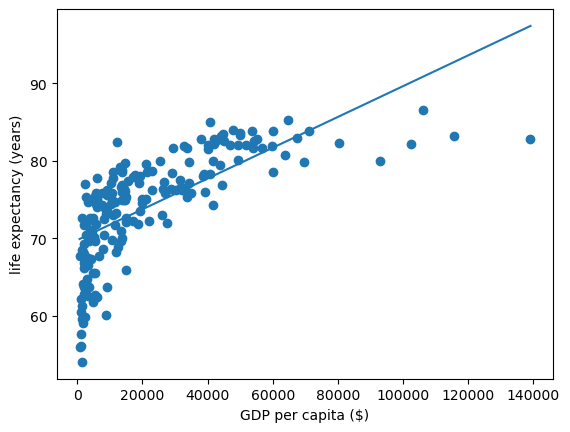

In [73]:
plt.scatter(X,y)
plt.plot(X, predictions)
plt.ylabel("life expectancy (years)")
plt.xlabel("GDP per capita ($)")
plt.show()

In [74]:
X = df.drop(" years", axis=1).values
y = df[" years"].values

### Linear Regression Using All Features

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
reg_all = LinearRegression()

In [78]:
reg_all.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = reg_all.predict(X_test)

### R-squared (one way to access regression model)
Quantifies the variance in target values explained by the features
- Values range from 0 to 1
- High R^2 means low variance
- Low R^2 means high variance in target values explained by the features


In [103]:
# R-Squared in scikit-learn
r_squared = reg_all.score(X_test, y_test)

### Mean squared error and root mean squared error
- MSE = 1/n i=1n(yi-yi)^2
- Measured in target units, squared
- RMSE = square root of MSE
- Measure RMSE in same units at the target variable

In [104]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

In [105]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [106]:
# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9007922330062297
RMSE: 1.9579531368933667


### Cross-validation
- Model performance is dependent on the way we split up the data
- Not representative of the model’s ability to generalize to unseen data
- Solution: cross-validation

Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- K folds = k-fold CV
- More folds = more computationally expensive


In [107]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

In [108]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

In [112]:
# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg_all, X, y, cv=kf)

In [113]:
# Print scores
print(cv_results)

[0.94436762 0.9216964  0.93964588 0.91515013 0.87777015 0.90348089]


### Evaluating cross-validation performance

In [114]:
# Print the mean
print(np.mean(cv_results))


# Print the standard deviation
print(np.std(cv_results))


# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.9170185113095322
0.022394369512705122
[0.88098399 0.9437774 ]


## Regularized regression
- Recall: linear regression minimizes a loss function
- It chooses a coefficient, a, for for each feature variable, plus b
- Large coefficients can lead to overfitting
- Regularization: penalize large coefficients

## Ridge regression
- Loss function = Ordinary Least Squares loss function + *i=1ai2
- Ridge penalizes large positive or negative coefficients
- alpha : parameter we need to choose
- Pricking  for ridge is similar to picking k in knn 
- Hyperparameter: variable used to optimize model parameters
 controls model complexity
 - alpha = 0 = Ordinary Least Squares (can lead to overfitting) when large coefficients are not penalized


In [115]:
# Import Ridge
from sklearn.linear_model import Ridge

In [118]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

In [119]:
for alpha in alphas:
    # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9007950417352133, 0.9008265412494425, 0.9011340522724214, 0.903606549391742, 0.9110806812577107, 0.9200764112812143]


C:\Users\LISX135\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.19145e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\LISX135\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.1989e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\LISX135\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.27336e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\LISX135\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.01888e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\LISX

### Lasso regression for feature selection

Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso
- Lasso regression for feature selection in scikit-learn


In [85]:
from sklearn.linear_model import Lasso

In [86]:
# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

In [87]:
# Fit the model to the data
lasso.fit(X, y)

Lasso(alpha=0.3)

In [88]:
# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_

In [89]:
print(lasso_coef)

[-2.21366061e-05 -1.06177724e-01  8.79349298e-14 -6.02065482e-03
 -1.50089345e-13 -5.37063799e-10  2.41045205e-02]


#### Useful for which factors are useful for physical phenomena

In [92]:
names = df.drop(' years', axis=1).columns

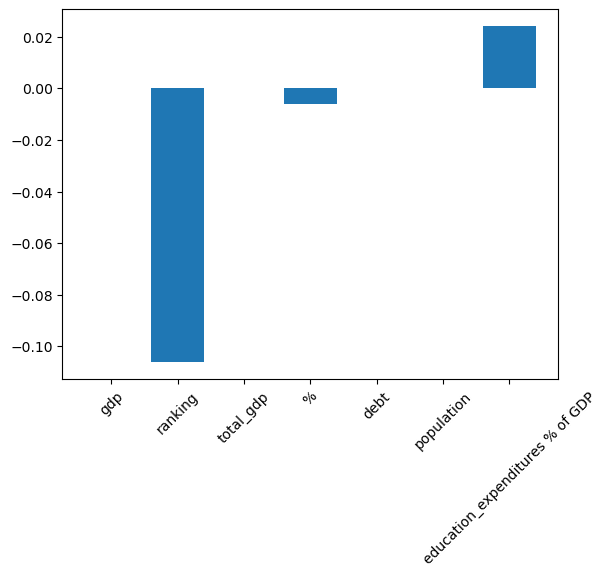

In [95]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

- note that % means % of unemployment

### From here, we can see that ranking and % unemployment are inversely related to life expectancy at birth, meanwhile, education expenditures in measure using % of GDP is directly porprotional to the life expectancy at birth.